<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/Nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Face/Train', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 114 images belonging to 3 classes.


In [21]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Face/Test', target_size=(128,128), batch_size=32, class_mode='categorical')


Found 114 images belonging to 3 classes.


In [22]:
training_set.class_indices

{'Giau': 0, 'Thuy Tien': 1, 'Truc Nhan': 2}

In [23]:
test_set.class_indices

{'Giau': 0, 'Thuy Tien': 1, 'Truc Nhan': 2}

In [24]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(114, 128, 128, 3)
(114, 3)


In [25]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(114, 128, 128, 3)
(114, 3)


In [27]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

face= model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
4/4 - 6s - loss: 2.1091 - accuracy: 0.3509 - 6s/epoch - 2s/step
Epoch 2/100
4/4 - 4s - loss: 1.1252 - accuracy: 0.3158 - 4s/epoch - 985ms/step
Epoch 3/100
4/4 - 4s - loss: 1.1030 - accuracy: 0.3333 - 4s/epoch - 978ms/step
Epoch 4/100
4/4 - 4s - loss: 1.0962 - accuracy: 0.3246 - 4s/epoch - 982ms/step
Epoch 5/100
4/4 - 4s - loss: 1.0645 - accuracy: 0.3684 - 4s/epoch - 975ms/step
Epoch 6/100
4/4 - 4s - loss: 1.0386 - accuracy: 0.4649 - 4s/epoch - 980ms/step
Epoch 7/100
4/4 - 4s - loss: 0.9892 - accuracy: 0.5351 - 4s/epoch - 983ms/step
Epoch 8/100
4/4 - 4s - loss: 0.8922 - accuracy: 0.5965 - 4s/epoch - 982ms/step
Epoch 9/100
4/4 - 4s - loss: 0.8100 - accuracy: 0.6842 - 4s/epoch - 973ms/step
Epoch 10/100
4/4 - 4s - loss: 0.7270 - accuracy: 0.7281 - 4s/epoch - 990ms/step
Epoch 11/100
4/4 - 4s - loss: 0.5826 - accuracy: 0.7982 - 4s/epoch - 990ms/step
Epoch 12/100
4/4 - 4s - loss: 0.5493 - accuracy: 0.7807 - 4s/epoch - 989ms/step
Epoch 13/100
4/4 - 4s - loss: 0.4923 - accuracy: 0.8

In [29]:
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 4.2085288441739976e-05
Train Accuracy 1.0


In [30]:
model.save("Face.h5")

In [31]:
model_CNN=load_model('Face.h5')

In [32]:
class_names = ["Giàu", "Thùy Tiên", "Trúc Nhân"]

1/1 [==============================] - 0s 30ms/step
[[0.9812418  0.00400612 0.0147521 ]]
Kết quả:  Giàu
Độ chính xác:  0.9812418


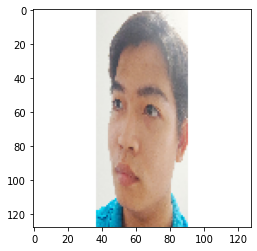

In [39]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Face/New folder/z3880280008928_1f2da8a6202b888d6d3355c1cef4a074.jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 30ms/step
[[1.7843147e-09 9.6839285e-01 3.1607177e-02]]
Kết quả:  Thùy Tiên
Độ chính xác:  0.96839285


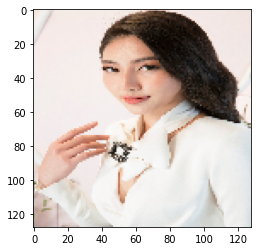

In [44]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Face/Test/Thuy Tien/NTTT3.jpeg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 30ms/step
[[5.0055426e-08 2.8356650e-11 1.0000000e+00]]
Kết quả:  Trúc Nhân
Độ chính xác:  1.0


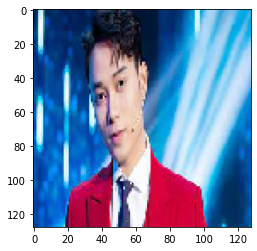

In [46]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Face/Test/Truc Nhan/54.jfif"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)